<a href="https://colab.research.google.com/github/vanviethieuanh/CS114.L21/blob/main/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS114.L21 - MÁY HỌC - MACHINE LEARNING**

#**BÀI TẬP COLAB SỐ 04 (31/05/2021)**

# **1. YÊU CẦU**
+ 31/05/2021: Tìm dataset
+ 14/06/2021: Train model

# **2. NHÓM THỰC HIỆN**
## THÀNH VIÊN:
+ Văn Viết Hiếu Anh - 19521225 - 19521225@gm.uit.edu.vn

+ Lê Văn Phước - 19522054 - 19522054@gm.uit.edu.vn

+ Nguyễn Đại Kỳ - 19521731 - 19521731@gm.uit.edu.vn

# **3. LINK GITHUB VÀ CÔNG CỤ**

+ Link GitHub nhóm: https://github.com/vanviethieuanh/CS114.L21

+ Link GitHub bài làm:

+ Link GitHub code crawl dataset:
  - 19521225: https://github.com/vanviethieuanh/CS114.L21/tree/main/News%20Scraping/19521225/news

  - 19522054: https://github.com/vanviethieuanh/CS114.L21/blob/main/News%20Scraping/19522054/news/web_scraping.ipynb

  - 19521731: https://github.com/vanviethieuanh/CS114.L21/blob/main/News%20Scraping/19521731/news/crawl.py

+ Link GitHub dataset:
 - Training Dataset: https://github.com/vanviethieuanh/CS114.L21/blob/main/News%20Scraping/data.json

 - Testing Dataset: https://github.com/vanviethieuanh/CS114.L21/blob/main/News%20Scraping/test_set.csv

 

# **4. SOURCE CODE**

## **4.1. Nguồn tham khảo**

1. Thông tin dữ liệu: https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

2. Thư viện bs4: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

3. THINGS TO KNOW IN NLP: https://www.kaggle.com/rushinaik/things-to-know-in-nlp

4. LSTMs (Beginner Friendly): https://www.kaggle.com/shivam017arora/sarcasm-detection-w-lstms-beginner-friendly




## **4.2. Code**

### **4.2.1. Thu thập dữ liệu**

  + Sau khi tham khảo thông tin dữ liệu ở trang Kaggle (Mục 4.1.2) và ý kiến bổ sung của thầy hướng dẫn, nhóm tiến hành crawl dữ liệu thành 4 thuộc tính:
    - headline : Tiêu đề bài báo
    - article_link : Đường dẫn đến bài báo
    - posted_at : Ngày đăng bài báo
    - is_sarcastic : Nhãn của bài báo (1 là bài báo châm biếm, 0 là bài báo bình thường)

**4.2.1.1 Tìm các trang web để crawl dữ liệu**

  + Nhóm đã chọn 4 bài báo châm biếm và 3 bài báo chính thống để tiến hành crawl dữ liệu.
  + Sử dụng các phương pháp khác nhau để crawl dữ liệu cho từng trang báo khác nhau.
  + Link các bài báo dùng để training:
    - Trang báo chính thông:
      + https://www.theguardian.com/
      + https://www.cbsnews.com
      + https://www.theaustralian.com.au/
    
    - Trang báo châm biếm:
      + https://clickhole.com/
      + https://thehardtimes.net/
      + https://www.thepoke.co.uk/
      + https://babylonbee.com/

  + Link các bài báo dùng để testing:
    - Trang báo chính thống:
      + https://www.huffingtonpost.com
    - Trang báo châm biếm:
      + https://www.theonion.com

### **4.2.2. Đọc dữ liệu và phân tích dữ liệu**

  + Import các thư viện cần thiết

In [5]:
import pandas as pd

  + Đọc dữ liệu từ file .json và show dữ liệu.

In [6]:
# Import link training
sar_acc = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Detection/data.json',lines=True)

In [7]:
sar_acc.head(10)

,article_link,headline,posted_at,is_sarcastic
0,https://www.theaustralian.com.au/world/the-tim...,‘Strike force’ to break Beijing’s grip on trade,9-Jun-21,0
1,https://www.theaustralian.com.au/world/the-tim...,"America’s richest men avoided billions in tax,...",9-Jun-21,0
2,https://www.theaustralian.com.au/world/the-tim...,Peacocks display contempt for LA,8-Jun-21,0
3,https://www.theaustralian.com.au/world/the-tim...,Regime lines up Iran’s next president — and su...,8-Jun-21,0
4,https://www.theaustralian.com.au/world/the-tim...,Jab slowdown a blow for Biden,8-Jun-21,0
5,https://www.theaustralian.com.au/world/the-tim...,Le Pen orders party purge,8-Jun-21,0
6,https://www.theaustralian.com.au/world/the-tim...,Confusing nerves ‘can help lower blood pressure’,8-Jun-21,0
7,https://www.theaustralian.com.au/world/the-tim...,Russia meddling at Cold War level,8-Jun-21,0
8,https://www.theaustralian.com.au/world/the-tim...,"Like a rocket: one hour, anywhere in the world",8-Jun-21,0
9,https://www.theaustralian.com.au/world/the-tim...,Biden pushes NATO on China,8-Jun-21,0


In [8]:
# Import link testing
sar_acc_test = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Detection/data_test.json',lines=True)

In [9]:
sar_acc_test.head(10)

,article_link,headline,is_sarcastic
0,https://dailybonnet.com/many-typical-mennonite...,How Many of These Typical Mennonite Things Hav...,1.0
1,https://dailybonnet.com/mennonite-town-bans-us...,Mennonite Town Bans Using Turn Signals,1.0
2,https://dailybonnet.com/police-raid-mennonite-...,"Police Raid Mennonite Gambling Den, Seize Hund...",1.0
3,https://dailybonnet.com/rare-plautdietsch-dict...,Rare Plautdietsch Dictionary Nets $2.3 Million...,1.0
4,https://dailybonnet.com/millennial-puts-nicest...,Millennial Puts on Her Nicest Ripped Jeans for...,1.0
5,https://dailybonnet.com/mennonite-womans-salad...,Mennonite Womans Salads Consist Mostly of Whip...,1.0
6,https://dailybonnet.com/church-attendance-way-...,Church Attendance “Way Up” in Calgary as Flame...,1.0
7,https://dailybonnet.com/local-chiropractor-spe...,Local Chiropractor Specializes in Treating Men...,1.0
8,https://dailybonnet.com/mennonite-man-discover...,Mennonite Couple Divorces After Discovering Co...,1.0
9,https://dailybonnet.com/vote-now-mennonite-osc...,Vote Now for the Mennonite Oscars 2018!,1.0


### **4.2.3. Sử dụng các phương pháp và các model khác nhau**

**4.2.3.1. Long Short Term Memory Models (LSTMs)**

  + Thêm các thư viện cần thiết

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import keras

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SimpleRNN
from keras.initializers import Constant
import keras.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import warnings
import string
import re

In [11]:
# Import training link
sar_acc = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Sarcasm_Detection/data.json", lines=True)

In [12]:
sar_acc.head(10)

,article_link,headline,posted_at,is_sarcastic
0,https://www.theaustralian.com.au/world/the-tim...,‘Strike force’ to break Beijing’s grip on trade,9-Jun-21,0
1,https://www.theaustralian.com.au/world/the-tim...,"America’s richest men avoided billions in tax,...",9-Jun-21,0
2,https://www.theaustralian.com.au/world/the-tim...,Peacocks display contempt for LA,8-Jun-21,0
3,https://www.theaustralian.com.au/world/the-tim...,Regime lines up Iran’s next president — and su...,8-Jun-21,0
4,https://www.theaustralian.com.au/world/the-tim...,Jab slowdown a blow for Biden,8-Jun-21,0
5,https://www.theaustralian.com.au/world/the-tim...,Le Pen orders party purge,8-Jun-21,0
6,https://www.theaustralian.com.au/world/the-tim...,Confusing nerves ‘can help lower blood pressure’,8-Jun-21,0
7,https://www.theaustralian.com.au/world/the-tim...,Russia meddling at Cold War level,8-Jun-21,0
8,https://www.theaustralian.com.au/world/the-tim...,"Like a rocket: one hour, anywhere in the world",8-Jun-21,0
9,https://www.theaustralian.com.au/world/the-tim...,Biden pushes NATO on China,8-Jun-21,0


In [13]:
# Import testing link
sar_acc_test = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Detection/data_test.json',lines=True)

In [14]:
sar_acc_test.head(10)

,article_link,headline,is_sarcastic
0,https://dailybonnet.com/many-typical-mennonite...,How Many of These Typical Mennonite Things Hav...,1.0
1,https://dailybonnet.com/mennonite-town-bans-us...,Mennonite Town Bans Using Turn Signals,1.0
2,https://dailybonnet.com/police-raid-mennonite-...,"Police Raid Mennonite Gambling Den, Seize Hund...",1.0
3,https://dailybonnet.com/rare-plautdietsch-dict...,Rare Plautdietsch Dictionary Nets $2.3 Million...,1.0
4,https://dailybonnet.com/millennial-puts-nicest...,Millennial Puts on Her Nicest Ripped Jeans for...,1.0
5,https://dailybonnet.com/mennonite-womans-salad...,Mennonite Womans Salads Consist Mostly of Whip...,1.0
6,https://dailybonnet.com/church-attendance-way-...,Church Attendance “Way Up” in Calgary as Flame...,1.0
7,https://dailybonnet.com/local-chiropractor-spe...,Local Chiropractor Specializes in Treating Men...,1.0
8,https://dailybonnet.com/mennonite-man-discover...,Mennonite Couple Divorces After Discovering Co...,1.0
9,https://dailybonnet.com/vote-now-mennonite-osc...,Vote Now for the Mennonite Oscars 2018!,1.0


  + Kiểm tra dữ liệu

In [15]:
# Kích thước bộ traning
sar_acc.shape

(173550, 4)

In [16]:
# Kích thước bộ testing
sar_acc_test.shape

(22620, 3)

In [17]:
# Kiểm tra trong dữ liệu training có giá trị null nào không?
sar_acc.isnull().sum().sum()

1

In [18]:
# Kiểm tra trong dữ liệu testing có giá trị null nào không?
sar_acc_test.isnull().sum().sum()

2

In [19]:
# Xóa bất cứ hàng nào có chứa giá trị null của bộ training
sar_acc = sar_acc.dropna(how='any', axis=0)

In [20]:
sar_acc

,article_link,headline,posted_at,is_sarcastic
0,https://www.theaustralian.com.au/world/the-tim...,‘Strike force’ to break Beijing’s grip on trade,9-Jun-21,0
1,https://www.theaustralian.com.au/world/the-tim...,"America’s richest men avoided billions in tax,...",9-Jun-21,0
2,https://www.theaustralian.com.au/world/the-tim...,Peacocks display contempt for LA,8-Jun-21,0
3,https://www.theaustralian.com.au/world/the-tim...,Regime lines up Iran’s next president — and su...,8-Jun-21,0
4,https://www.theaustralian.com.au/world/the-tim...,Jab slowdown a blow for Biden,8-Jun-21,0
...,...,...,...,...
173545,https://www.newyorker.com/news/hendrik-hertzbe...,The Day After,12/08/2008,1
173546,https://www.newyorker.com/news/hendrik-hertzbe...,Acid Flashback,12/08/2008,1
173547,https://www.newyorker.com/news/hendrik-hertzbe...,UsTube and ThemTube,12/08/2008,1
173548,https://www.newyorker.com/news/hendrik-hertzbe...,An Opening,12/08/2008,1


In [21]:
# Xóa bất cứ hàng nào có chứa giá trị null của bộ testing
sar_acc_test = sar_acc_test.dropna(how='any', axis=0)

In [22]:
sar_acc_test

,article_link,headline,is_sarcastic
0,https://dailybonnet.com/many-typical-mennonite...,How Many of These Typical Mennonite Things Hav...,1.0
1,https://dailybonnet.com/mennonite-town-bans-us...,Mennonite Town Bans Using Turn Signals,1.0
2,https://dailybonnet.com/police-raid-mennonite-...,"Police Raid Mennonite Gambling Den, Seize Hund...",1.0
3,https://dailybonnet.com/rare-plautdietsch-dict...,Rare Plautdietsch Dictionary Nets $2.3 Million...,1.0
4,https://dailybonnet.com/millennial-puts-nicest...,Millennial Puts on Her Nicest Ripped Jeans for...,1.0
...,...,...,...
22614,https://www.nytimes.com/2019/06/05/opinion/let...,"Impeaching Trump: A Moral Imperative, or Point...",0.0
22615,https://www.nytimes.com/2019/06/05/world/middl...,An American Family Detained in Syria Is Sent B...,0.0
22616,https://www.nytimes.com/2019/06/05/climate/glo...,"Can the Paris Climate Goals Save Lives? Yes, a...",0.0
22617,https://www.nytimes.com/2019/06/05/nyregion/qu...,A Day at Queens Farm (and the Restaurants You ...,0.0


In [23]:
# Đếm số tiêu đề trùng lặp bị gán lable khác nhau của data training set.
count_of_target = 0
for target in sar_acc.groupby(sar_acc.headline).is_sarcastic.agg(list):
    if(len(set(list(target))) != 1):
        count_of_target += 1
print(count_of_target)

2


In [24]:
# Đếm số tiêu đề trùng lặp bị gán lable khác nhau của data testing set.
count_of_target = 0
for target in sar_acc_test.groupby(sar_acc_test.headline).is_sarcastic.agg(list):
    if(len(set(list(target))) != 1):
        count_of_target += 1
print(count_of_target)

0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



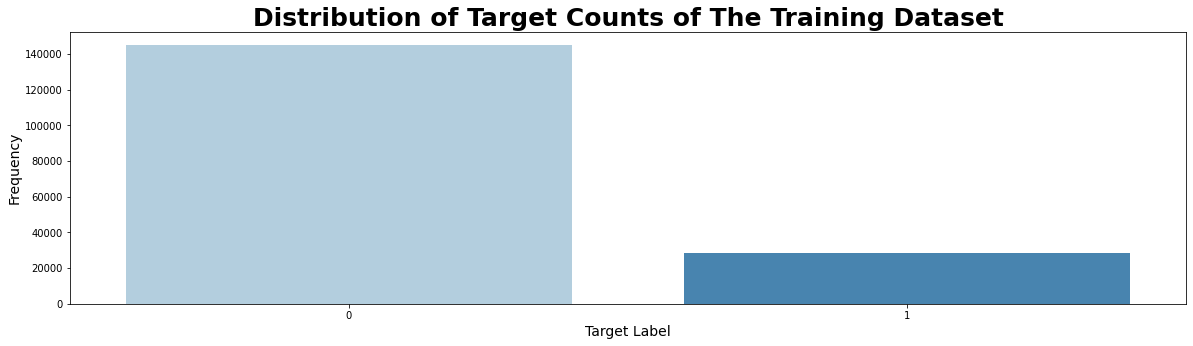

In [25]:
# Show số lượng data của các thuộc tính trong bộ training
plt.figure(figsize=(20,5))
sns.countplot(sar_acc.is_sarcastic, palette='Blues')
plt.title("Distribution of Target Counts of The Training Dataset", size=25, weight='bold')
plt.xlabel("Target Label", size=14)
plt.ylabel("Frequency", size=14)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



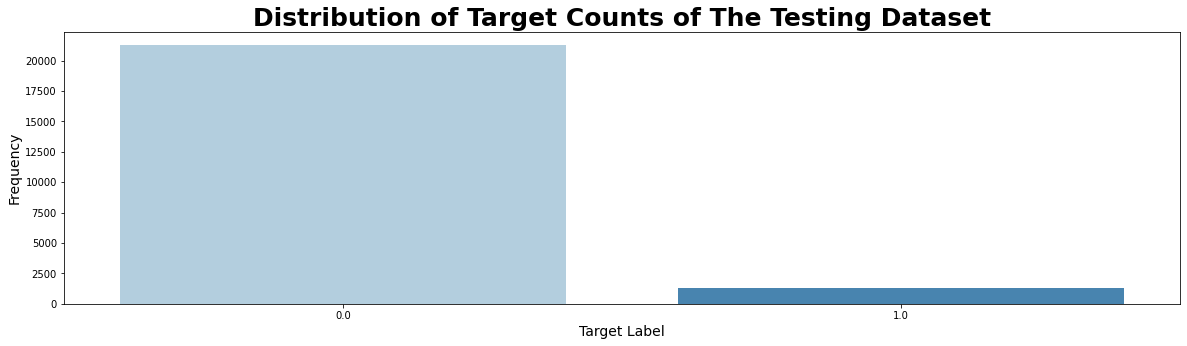

In [26]:
# Show số lượng data của các thuộc tính trong bộ testing
plt.figure(figsize=(20,5))
sns.countplot(sar_acc_test.is_sarcastic, palette='Blues')
plt.title("Distribution of Target Counts of The Testing Dataset", size=25, weight='bold')
plt.xlabel("Target Label", size=14)
plt.ylabel("Frequency", size=14)
plt.show()


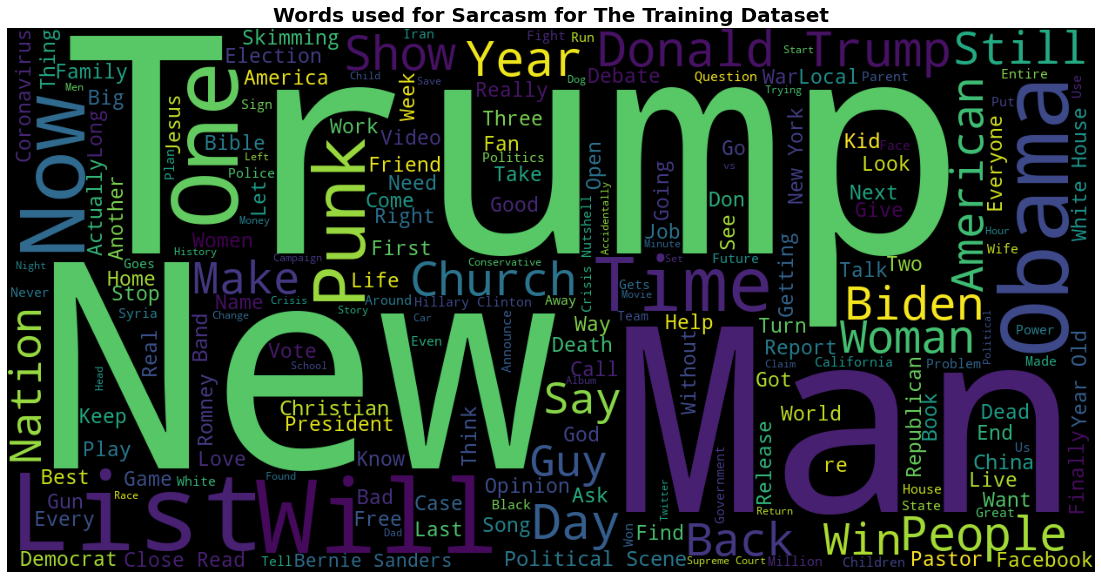

In [27]:
# Show số lần xuất hiện của các từ trong bài báo châm biếm của bộ training 
all_keywords = " ".join(line for line in sar_acc[sar_acc.is_sarcastic==1].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(all_keywords)
plt.figure(figsize=(20, 10))
plt.title("Words used for Sarcasm for The Training Dataset", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

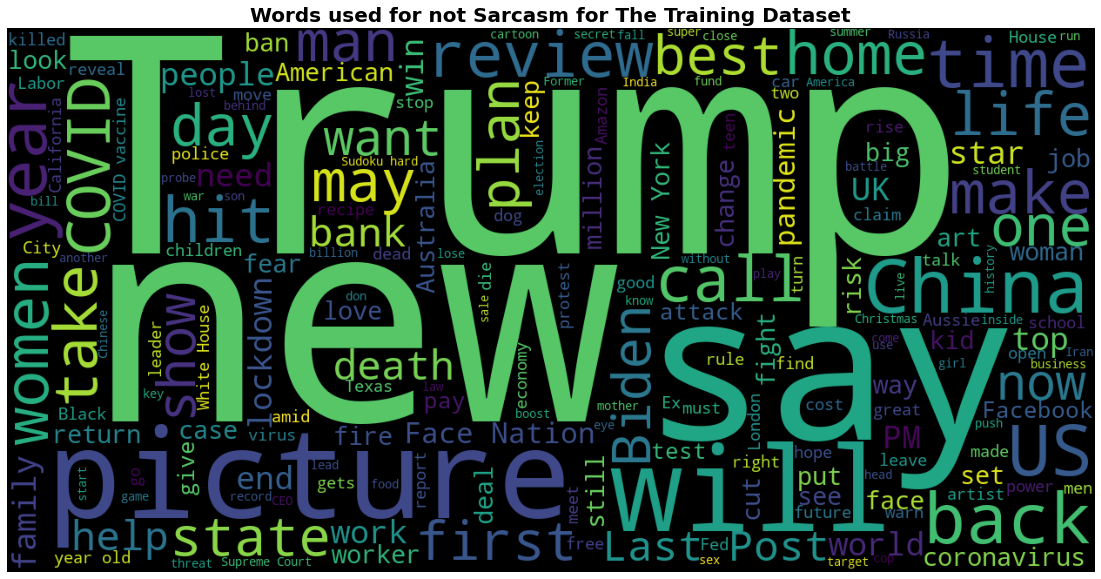

In [28]:
# Show số lần xuất hiện của các từ trong bài báo không châm biếm của bộ training 
all_keywords = " ".join(line for line in sar_acc[sar_acc.is_sarcastic==0].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(all_keywords)
plt.figure(figsize=(20, 10))
plt.title("Words used for not Sarcasm for The Training Dataset", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

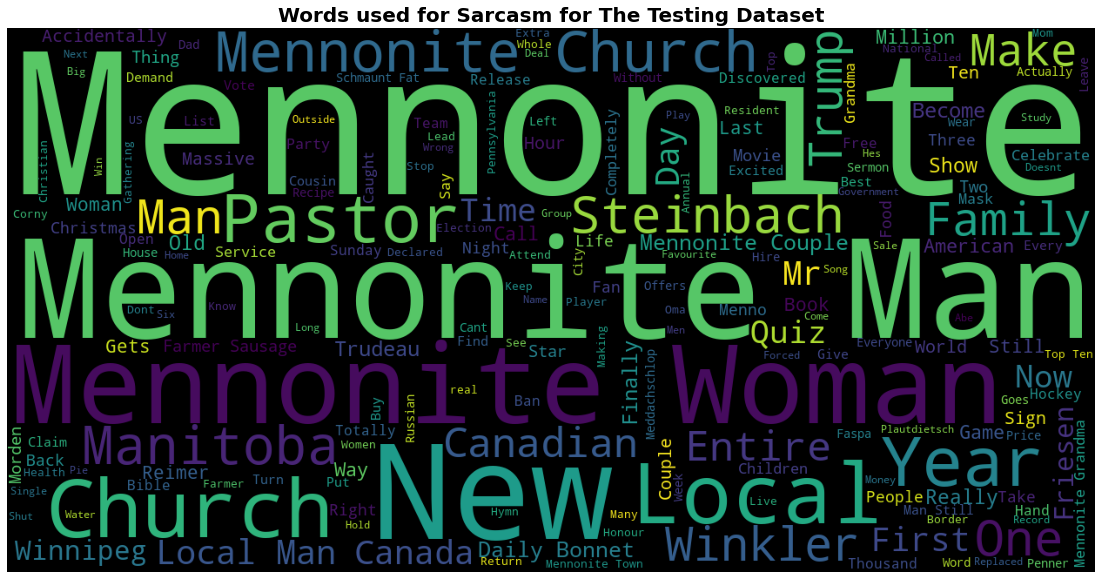

In [29]:
# Show số lần xuất hiện của các từ trong bài báo châm biếm của bộ testing
all_keywords = " ".join(line for line in sar_acc_test[sar_acc_test.is_sarcastic==1].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(all_keywords)
plt.figure(figsize=(20, 10))
plt.title("Words used for Sarcasm for The Testing Dataset", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

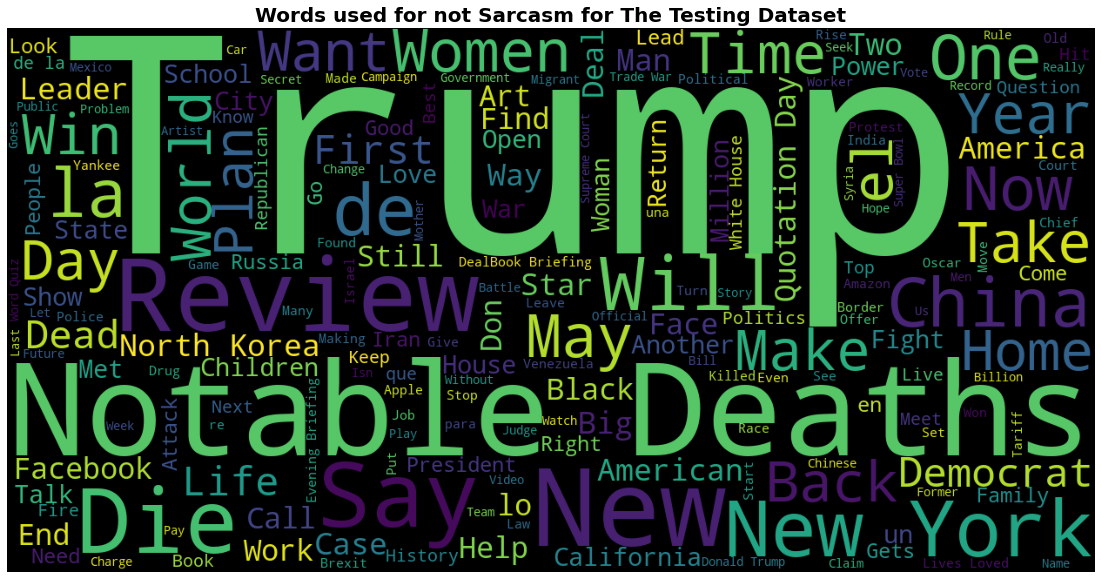

In [30]:
# Show số lần xuất hiện của các từ trong bài báo không châm biếm của bộ testing
all_keywords = " ".join(line for line in sar_acc_test[sar_acc_test.is_sarcastic==0].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(all_keywords)
plt.figure(figsize=(20, 10))
plt.title("Words used for not Sarcasm for The Testing Dataset", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

  + Làm sạch dữ liệu

In [31]:
# Downloading package stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
# Hàm loại bỏ các từ không cần thiết trong tiêu đề bài báo
def clean_headline(headline):
    STOPWORDS = set(stopwords.words("english"))
    headline = headline.lower()
    headline = " ".join(word for word in headline.split() if word not in STOPWORDS)
    headline = "".join(word for word in headline if word not in set(string.punctuation))
    return headline

In [33]:
# Loại bỏ các từ không cần thiết trong tiêu đề bài báo của bộ training
sar_acc.headline = sar_acc.headline.apply(clean_headline)
sar_acc.drop('article_link', inplace=True, axis=1)
sar_acc.head(10)

,headline,posted_at,is_sarcastic
0,‘strike force’ break beijing’s grip trade,9-Jun-21,0
1,america’s richest men avoided billions tax lea...,9-Jun-21,0
2,peacocks display contempt la,8-Jun-21,0
3,regime lines iran’s next president — supreme l...,8-Jun-21,0
4,jab slowdown blow biden,8-Jun-21,0
5,le pen orders party purge,8-Jun-21,0
6,confusing nerves ‘can help lower blood pressure’,8-Jun-21,0
7,russia meddling cold war level,8-Jun-21,0
8,like rocket one hour anywhere world,8-Jun-21,0
9,biden pushes nato china,8-Jun-21,0


In [34]:
# Loại bỏ các từ không cần thiết trong tiêu đề bài báo của bộ testing
sar_acc_test.headline = sar_acc_test.headline.apply(clean_headline)
sar_acc_test.drop('article_link', inplace=True, axis=1)
sar_acc_test.head(10)

,headline,is_sarcastic
0,many typical mennonite things done,1.0
1,mennonite town bans using turn signals,1.0
2,police raid mennonite gambling den seize hundr...,1.0
3,rare plautdietsch dictionary nets 23 million s...,1.0
4,millennial puts nicest ripped jeans church sunday,1.0
5,mennonite womans salads consist mostly whipped...,1.0
6,church attendance “way up” calgary flames thre...,1.0
7,local chiropractor specializes treating mennon...,1.0
8,mennonite couple divorces discovering common a...,1.0
9,vote mennonite oscars 2018,1.0


  + Tiền xử lý dữ liệu trước khi cho vào model để train

In [35]:
# Downloading package punkt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
# Định dạng từ và đếm số từ trong bộ training
corpus_train = []
for text in sar_acc['headline']:
    words = [word.lower() for word in word_tokenize(text)] 
    corpus_train.append(words)
num_words_train = len(corpus_train)
print(num_words_train)

173549


In [37]:
# Định dạng từ và đếm số từ trong bộ testing
corpus_test = []
for text in sar_acc_test['headline']:
    words = [word.lower() for word in word_tokenize(text)] 
    corpus_test.append(words)
num_words_test = len(corpus_test)
print(num_words_test)

22619


In [38]:
# Tổng số từ (có các từ trùng lặp) của bộ dữ liệu
num_words = num_words_train + num_words_test
print(num_words)

196168


In [39]:
# Lấy dữ liệu traing
X_train = sar_acc['headline'].values
y_train = sar_acc['is_sarcastic'].values

In [40]:
# Lấy dữ liệu testing
X_test = sar_acc_test['headline'].values
y_test = sar_acc_test['is_sarcastic'].values

In [41]:
max_len = 32
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, truncating='post', padding='post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, truncating='post', padding='post')

In [42]:
# Lấy tổng số từ (không có trùng lặp) có trong bộ dữ liệu
word_index = tokenizer.word_index
print("Number of unique words: {}".format(len(word_index)))

Number of unique words: 71600


In [43]:
# So sánh các từ có trong bộ dữ liệu với các vectors tương ứng của từ đó trong glove.twitter.27B.100d.txt
embedding = {}
with open("/content/drive/MyDrive/Colab Notebooks/Sarcasm_Detection/glove.twitter.27B.100d.txt") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding[word] = vectors
file.close()

In [44]:
# Thay thế các từ trong bộ dữ liệu bằng các vectors
embedding_matrix = np.zeros((num_words, 100))
for i, word in tokenizer.index_word.items():
    if i < (num_words+1):
        vector = embedding.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

In [45]:
embedding_matrix.shape

(196168, 100)

  + Mô hình hóa

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(173549, 32) (173549,)
(22619, 32) (22619,)


 + Simple RNN model

In [47]:
# Khởi tạo model
simpleRNN = model = Sequential()

# Thêm các thuộc tính, các hàm tương ứng với bộ dữ liệu
simpleRNN.add(Embedding(input_dim=num_words, output_dim=100, 
                    embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, trainable=False))
simpleRNN.add(SimpleRNN(64, dropout=0.1))
simpleRNN.add(Dense(1, activation='sigmoid'))

simpleRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
simpleRNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           19616800  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                10560     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 19,627,425
Trainable params: 10,625
Non-trainable params: 19,616,800
_________________________________________________________________


In [49]:
# Chạy quá trình train và fit model sao cho phù hợp với dữ liệu
history = simpleRNN.fit(X_train, y_train, epochs=4, batch_size=1024, validation_data=(X_test, y_test))

Epoch 1/4
170/170 [==============================] - 45s 127ms/step - loss: 0.4240 - accuracy: 0.8347 - val_loss: 0.3402 - val_accuracy: 0.8801
Epoch 2/4
170/170 [==============================] - 20s 118ms/step - loss: 0.3407 - accuracy: 0.8617 - val_loss: 0.3285 - val_accuracy: 0.8916
Epoch 3/4
170/170 [==============================] - 20s 118ms/step - loss: 0.3297 - accuracy: 0.8671 - val_loss: 0.3795 - val_accuracy: 0.8270
Epoch 4/4
170/170 [==============================] - 20s 119ms/step - loss: 0.3173 - accuracy: 0.8727 - val_loss: 0.4098 - val_accuracy: 0.8026


In [50]:
# Show ra bảng phân loại và kết quả
print(classification_report(y_test, simpleRNN.predict_classes(X_test)))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89     21294
         1.0       0.08      0.24      0.12      1325

    accuracy                           0.80     22619
   macro avg       0.52      0.54      0.51     22619
weighted avg       0.90      0.80      0.84     22619



  + LSTM Model

In [51]:
# Khởi tạo model
lstm_model = Sequential()

# Thêm các thuộc tính, các hàm tương ứng với bộ dữ liệu
lstm_model.add(Embedding(input_dim=num_words, output_dim=100, 
                    embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, trainable=False))
lstm_model.add(LSTM(50, dropout=0.1))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 100)           19616800  
_________________________________________________________________
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 19,647,051
Trainable params: 30,251
Non-trainable params: 19,616,800
_________________________________________________________________


In [53]:
# Chạy quá trình train và fit model sao cho phù hợp với dữ liệu
history = lstm_model.fit(X_train, y_train, epochs=4, batch_size=1024, validation_data=(X_test, y_test))

Epoch 1/4
170/170 [==============================] - 46s 248ms/step - loss: 0.4940 - accuracy: 0.8246 - val_loss: 0.3133 - val_accuracy: 0.8818
Epoch 2/4
170/170 [==============================] - 44s 262ms/step - loss: 0.3111 - accuracy: 0.8753 - val_loss: 0.3363 - val_accuracy: 0.8619
Epoch 3/4
170/170 [==============================] - 41s 240ms/step - loss: 0.2705 - accuracy: 0.8928 - val_loss: 0.3703 - val_accuracy: 0.8476
Epoch 4/4
170/170 [==============================] - 41s 242ms/step - loss: 0.2574 - accuracy: 0.8977 - val_loss: 0.3987 - val_accuracy: 0.8254


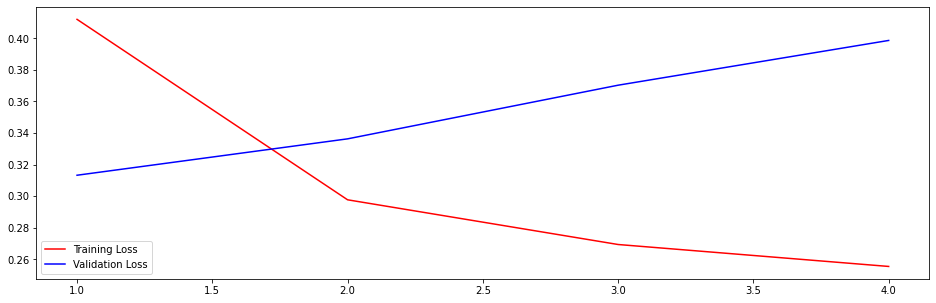

In [54]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

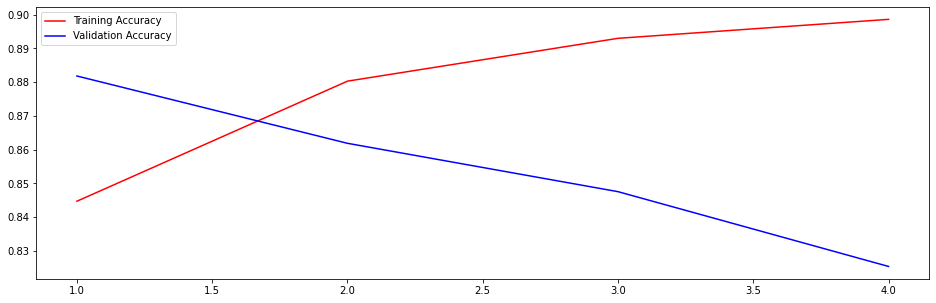

In [55]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

In [56]:
# Show ra bảng phân loại và kết quả
print(classification_report(y_test, lstm_model.predict_classes(X_test)))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     21294
         1.0       0.12      0.30      0.17      1325

    accuracy                           0.83     22619
   macro avg       0.53      0.58      0.54     22619
weighted avg       0.90      0.83      0.86     22619



  + Bidirectional LSTM model

In [57]:
# Khởi tạo model
biLSTM = Sequential()

# Thêm các thuộc tính, các hàm tương ứng với bộ dữ liệu
biLSTM.add(Embedding(input_dim=num_words, output_dim=100, 
                    embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, trainable=False))
biLSTM.add(Bidirectional(LSTM(units=64, recurrent_dropout = 0.3, dropout = 0.3, 
                             return_sequences = True)))
biLSTM.add(Bidirectional(LSTM(units=32, recurrent_dropout = 0.1, dropout = 0.1)))
biLSTM.add(Dense(1, activation='sigmoid'))

biLSTM.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
biLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 100)           19616800  
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 128)           84480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 19,742,561
Trainable params: 125,761
Non-trainable params: 19,616,800
_________________________________________________________________


In [59]:
# Chạy quá trình train và fit model sao cho phù hợp với dữ liệu
history = biLSTM.fit(X_train, y_train, epochs=4, batch_size=1024, 
                    validation_data=(X_test, y_test))

Epoch 1/4
170/170 [==============================] - 357s 2s/step - loss: 0.3675 - accuracy: 0.8534 - val_loss: 0.3723 - val_accuracy: 0.8447
Epoch 2/4
170/170 [==============================] - 322s 2s/step - loss: 0.2465 - accuracy: 0.9034 - val_loss: 0.4725 - val_accuracy: 0.7918
Epoch 3/4
170/170 [==============================] - 323s 2s/step - loss: 0.2246 - accuracy: 0.9116 - val_loss: 0.4887 - val_accuracy: 0.7929
Epoch 4/4
170/170 [==============================] - 323s 2s/step - loss: 0.2120 - accuracy: 0.9171 - val_loss: 0.4620 - val_accuracy: 0.7938


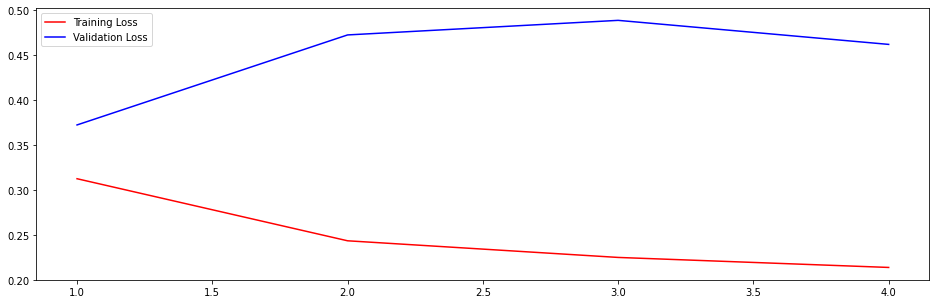

In [60]:
# Show ra đường Training Loss và Validation Loss
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

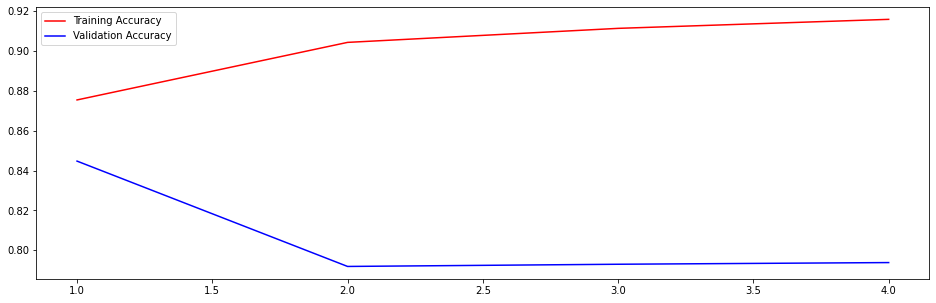

In [61]:
# Show ra đường Training Accuracy và Validation Accuracy
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

In [62]:
# Show ra bảng phân loại và kết quả
print(classification_report(y_test, biLSTM.predict_classes(X_test)))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     21294
         1.0       0.12      0.40      0.18      1325

    accuracy                           0.79     22619
   macro avg       0.54      0.61      0.53     22619
weighted avg       0.91      0.79      0.84     22619



**4.2.3.2. Logistic Regression, MultinomialNB**

  + Importing libraries

In [63]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
# Lấy dữ liệu
sar_acc = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Detection/data.json',lines=True)

In [65]:
sar_acc.head(10)

,article_link,headline,posted_at,is_sarcastic
0,https://www.theaustralian.com.au/world/the-tim...,‘Strike force’ to break Beijing’s grip on trade,9-Jun-21,0
1,https://www.theaustralian.com.au/world/the-tim...,"America’s richest men avoided billions in tax,...",9-Jun-21,0
2,https://www.theaustralian.com.au/world/the-tim...,Peacocks display contempt for LA,8-Jun-21,0
3,https://www.theaustralian.com.au/world/the-tim...,Regime lines up Iran’s next president — and su...,8-Jun-21,0
4,https://www.theaustralian.com.au/world/the-tim...,Jab slowdown a blow for Biden,8-Jun-21,0
5,https://www.theaustralian.com.au/world/the-tim...,Le Pen orders party purge,8-Jun-21,0
6,https://www.theaustralian.com.au/world/the-tim...,Confusing nerves ‘can help lower blood pressure’,8-Jun-21,0
7,https://www.theaustralian.com.au/world/the-tim...,Russia meddling at Cold War level,8-Jun-21,0
8,https://www.theaustralian.com.au/world/the-tim...,"Like a rocket: one hour, anywhere in the world",8-Jun-21,0
9,https://www.theaustralian.com.au/world/the-tim...,Biden pushes NATO on China,8-Jun-21,0


  + Text Processing

In [66]:
def text_process(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    #print(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [67]:
def conf_matrix_acc(y_true, y_pred):
    print('Confusion Matrix is :\n',confusion_matrix(y_true, y_pred))
    print('\nAccuracy Score is:',accuracy_score(y_true, y_pred))

In [68]:
# Xóa bất cứ hàng nào có chứa giá trị null của bộ data
sar_acc = sar_acc.dropna(how='any', axis=0)

In [69]:
sar_acc.shape

(173549, 4)

In [70]:
# how text proccess work 
# using apply function to  apply every line of column headline to the functions text_process
print(text_process("hey ! it's good to see you "))
text_feat = sar_acc['headline']
text_feat = text_feat.apply(text_process)

hey good see


In [71]:
text_feat

0                 ‘Strike force’ break Beijing’s grip trade
1         America’s richest men avoided billions tax lea...
2                              Peacocks display contempt LA
3         Regime lines Iran’s next president — supreme l...
4                                   Jab slowdown blow Biden
                                ...                        
173545                                                  Day
173546                                       Acid Flashback
173547                                      UsTube ThemTube
173548                                              Opening
173549                                                 Wham
Name: headline, Length: 173549, dtype: object

  + TFIDF Vectorizer

In [72]:
# created instance 
vectorizer = TfidfVectorizer("english")

In [73]:
# created the vectors using fit_transform 
features = vectorizer.fit_transform(text_feat)
features

<173549x59638 sparse matrix of type '<class 'numpy.float64'>'
	with 1060820 stored elements in Compressed Sparse Row format>

In [74]:
print(features)

  (0, 54419)	0.339471813036236
  (0, 24839)	0.4953713393975652
  (0, 7855)	0.41438147648202966
  (0, 9638)	0.3953581244134789
  (0, 22369)	0.38882837897817096
  (0, 51544)	0.40019815262865743
  (1, 45256)	0.304154158251944
  (1, 31516)	0.3927881026902462
  (1, 52957)	0.2789543716840791
  (1, 8359)	0.3631045164156118
  (1, 6703)	0.4463321793625103
  (1, 34533)	0.2864935338745455
  (1, 45441)	0.4197406792141249
  (1, 4975)	0.29338392254250245
  (2, 31010)	0.40016512741856897
  (2, 13939)	0.5091145574913671
  (2, 17254)	0.4412965592953002
  (2, 40029)	0.6212307018351388
  (3, 31499)	0.3594033536243141
  (3, 52170)	0.34697343107690104
  (3, 42187)	0.3367399130989147
  (3, 37164)	0.33120859703533073
  (3, 28981)	0.3425999486220359
  (3, 32143)	0.4182000838015695
  (3, 44422)	0.4848502127656348
  :	:
  (173535, 24234)	0.46988810558792227
  (173535, 13113)	0.520660975313714
  (173536, 30843)	0.6143539233399741
  (173536, 59207)	0.6045754785923628
  (173536, 45594)	0.507008626713192
  (173537,

  + Chia Dữ liệu và tiến hành train model

In [75]:
# splitted the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(features, sar_acc['is_sarcastic'],
                                                    test_size=0.3, random_state=123)

In [76]:
# Instace of logistic regression & MultinomialNB is created 
lr = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB(alpha=0.2)

In [77]:
# fitting the model 
print(lr.fit(X_train, y_train))
print(mnb.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)


In [78]:
# predicting the model 
y_pred_lr = lr.predict(X_test)
y_pred_nb = mnb.predict(X_test)

In [79]:
# ploting confusion matrix 
print('Logistic Regression:')
conf_matrix_acc(y_test, y_pred_lr)
print('\nMultinomialNB: ')
conf_matrix_acc(y_test, y_pred_nb)

Logistic Regression:
Confusion Matrix is :
 [[42744   746]
 [ 4658  3917]]

Accuracy Score is: 0.8962066647459905

MultinomialNB: 
Confusion Matrix is :
 [[42880   610]
 [ 4888  3687]]

Accuracy Score is: 0.8944012292326899


**4.2.3.3. BERT Model**

  + Thêm các thư viện cần thiết

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing

  + Đọc dữ liệu từ file .json

In [81]:
final_data = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Sarcasm_Detection/data.json", lines=True)
print(final_data.shape)

(173550, 4)


In [82]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173550 entries, 0 to 173549
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_link  173550 non-null  object
 1   headline      173549 non-null  object
 2   posted_at     173550 non-null  object
 3   is_sarcastic  173550 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.3+ MB


  + Tạo DataFrame ứng với dữ liệu X, y

In [83]:
df = pd.DataFrame()
df['text'] = final_data['headline']
df['label'] = final_data['is_sarcastic']

In [84]:
# Download thư viện simpletransformers
!pip install simpletransformers

     |████████████████████████████████| 225kB 5.3MB/s 
     |████████████████████████████████| 7.8MB 7.7MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 1.8MB 31.5MB/s 
     |████████████████████████████████| 1.2MB 31.5MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 245kB 39.2MB/s 
     |████████████████████████████████| 122kB 44.4MB/s 
     |████████████████████████████████| 2.5MB 34.2MB/s 
     |████████████████████████████████| 3.3MB 35.0MB/s 
     |████████████████████████████████| 4.2MB 28.7MB/s 
     |████████████████████████████████| 174kB 31.3MB/s 
     |████████████████████████████████| 112kB 42.0MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 133kB 42.6MB/s 
     |████████████████████████████████| 122kB 43.4MB/s 
     |████████████████████████████████| 245kB 49.8MB/s 
 

In [85]:
from simpletransformers.classification import ClassificationModel

# Khởi tạo model
model = ClassificationModel('bert', 'bert-base-cased', num_labels=2, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [86]:
from sklearn.model_selection import train_test_split

df_sample = df.sample(frac = 1)

# Chia dư liệu 
train_df,eval_df = train_test_split(df_sample,test_size = 0.3)

print(train_df.shape)
print(eval_df.shape)

(121485, 2)
(52065, 2)


  + Tạo bộ dữ liệu phù hợp với model

In [87]:
train_df2 = pd.DataFrame({
    'text': train_df['text'].replace(r'\n', ' ', regex=True),
    'label': train_df['label']
})

eval_df2 = pd.DataFrame({
    'text': eval_df['text'].replace(r'\n', ' ', regex=True),
    'label': eval_df['label']
})

  + Tiến hành train

In [ ]:
%%time
model.train_model(train_df2)

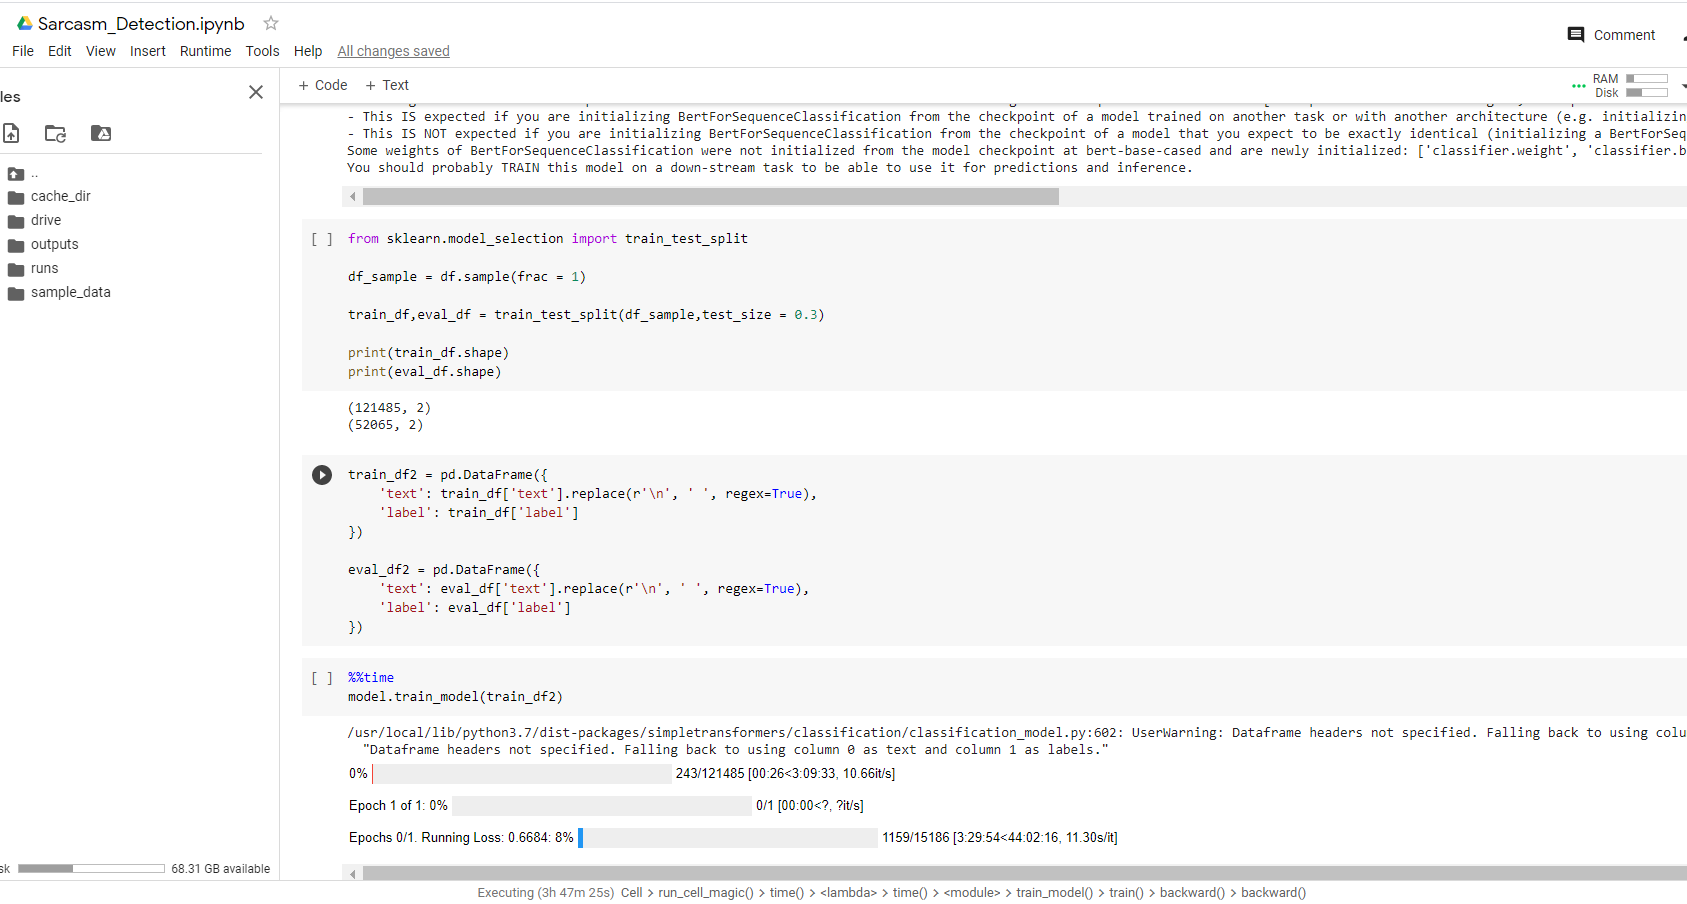

image.png

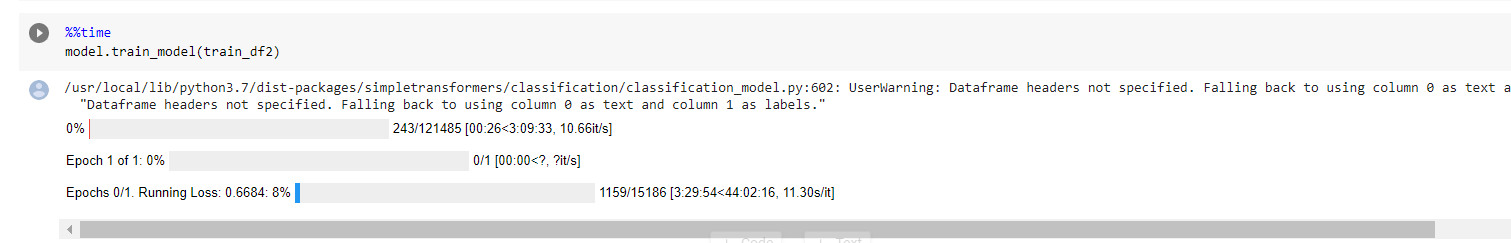

  + Lấy kết quả từ quá trình train

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df2)

In [ ]:
print(result)
print(model_outputs)

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))
true = eval_df2['label'].tolist()
predicted = lst

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))
true = eval_df2['label'].tolist()
predicted = lst

In [ ]:
import sklearn
print(sklearn.metrics.classification_report(true,predicted,target_names=['No Sarcasm' ,'Sarcasm']))

In [ ]:
sklearn.metrics.accuracy_score(true,predicted)

# **5.NHẬN XÉT**
## **5.1 Thu Thập Dữ Liệu**

  + Từ bộ dữ liệu tổng hợp được của các thành viên trong nhóm, ta thấy:
    - Số lượng data trong mỗi lớp phân loại là khác nhau và có tỷ lệ chêch lệch là khá lớn. Với data có lable bằng 0 thì số lượng rất lớn, do các bài báo chính thống thì thường được xuất bản mỗi ngày và có nhiều lĩnh vực khác nhau để ra bài. Còn data có lable bằng 1 thì số lượng data rất ít so với lable bằng 0, do đây là những bài báo châm biếm, có rất ít lĩnh vực để viết và số báo ra mỗi tuần là rất ít.
    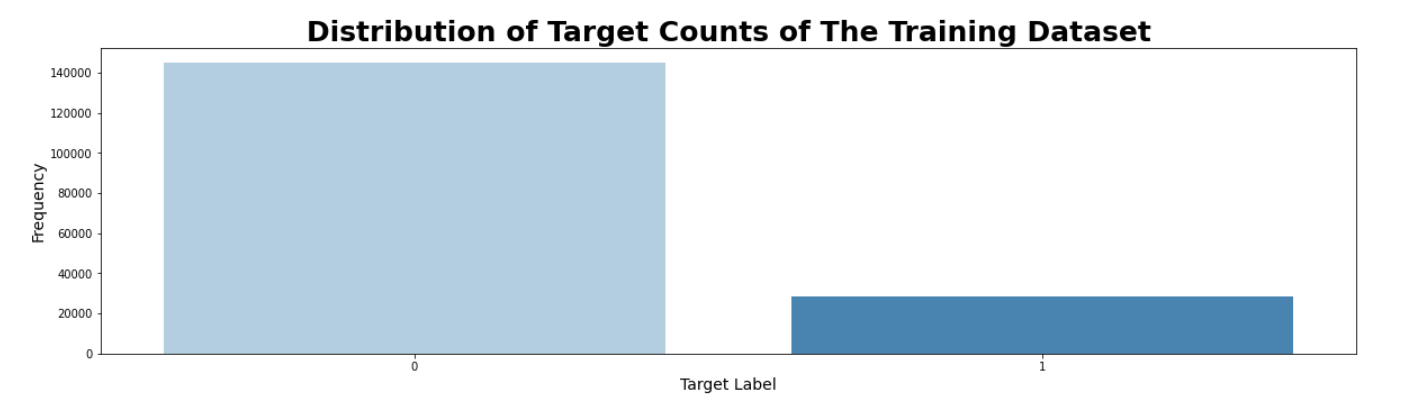
    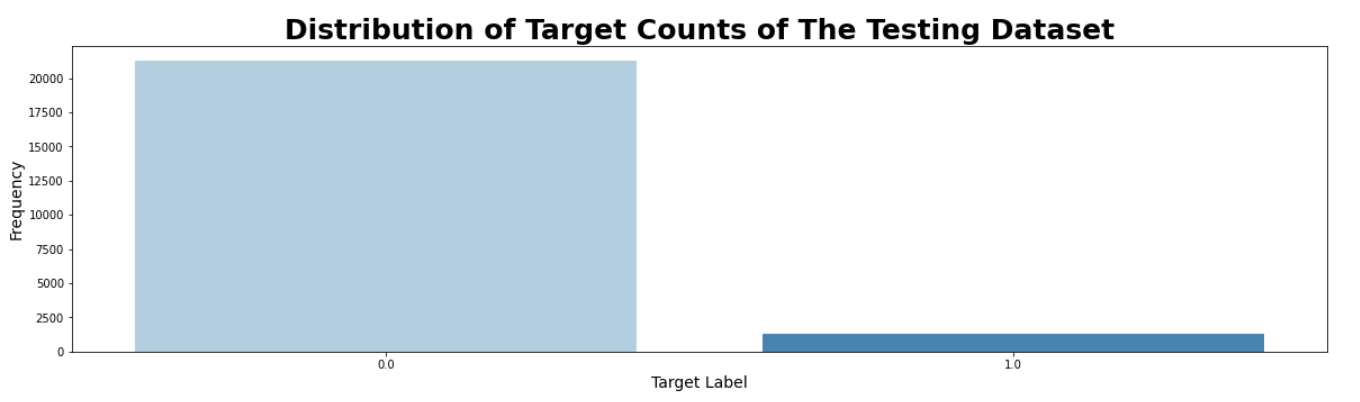
    - Trong bộ data còn có những hàng dữ liệu chứa giá trị null, giá trị trùng lặp nhau và cả những dữ liệu cùng một bộ data nhưng được gán nhãn khác nhau. Tuy nhóm đã có những hàm loai bỏ bớt một số vấn đề trên, những vẫn chưa có được một bộ data chuẩn

## **5.2. Train Model**

### **5.2.1. Nhận xét chung.**

  + Nhóm đã sử dụng nhiều model khác nhau của NLP để train dữ liệu thu thập được. Như Long Short Term Memory Models (LSTMs), Logistic Regression, MultinomialNB, BERT model

  + Việc xử lý dữ liệu trước khi train cũng khác nhau giữa các phương pháp train khác nhau. Một số phương pháp được áp dụng ở trên như stopwords, embedding, TFIDF Vectorizer.
  

  + Từ kết quả thu được ở mỗi phương pháp, ta thấy vì bộ dữ liệu train và test có sự chêch lệch nhau lớn giữa các lable, mặc dù nhóm đã sử dụng 4 trang báo châm biếm để bù lại với sô lượng lớn các bài báo từ 3 trang báo chính thống nhưng nó vẫn không khác biệt nhiều, vẫn có sự chênh lệch lớn. Vì vậy, mặc dù accuracy trung bình là khá cao nhưng khi nhìn vào bảng classification report thì ta thấy:

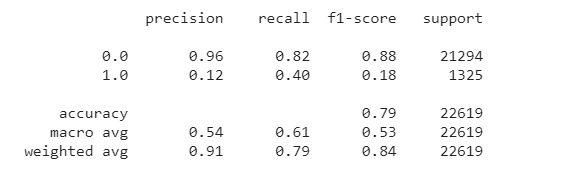

  - Với lable 0 thì cho ra kết quả ở cả 3 giá trị precision, recall và f1-score đều khá cao.
  - Nhưng với lable 1 thì nó lại cho ra kết quả rất thấp ở cả 3 giá trị precision, recall và f1-score.

### **5.2.2. Nhận xét riêng**

+  **Long Short Term Memory Models (LSTMs)**
  - Nhóm đã sử dụng nhiều model khác nhau cho phương pháp này, cụ thể là Simple RNN model, LSTM Model, Bidirectional LSTM model.
    + Với Simple RNN model thì cho kết quả thấp nhất trong 3 phương pháp
    + LSTM Model, Bidirectional LSTM model thì cho kết quả dự đoán khá giống nhau dựa trên bảng classification report.
  - Kết quả của phương pháp này tương đối cao so dự trên accuracy trung bình, nhưng thực tế khi dự đoán thì cho độ sai lệch khá cao.
  - Những đường biểu diễn như Training Accuracy, Validation Accuracy thì không có sự tương đồng giữa các đường đi



+ **Logistic Regression, MultinomialNB**
  - Dựa trên kết quả từ accuracy Score và Confusion Matrix, ta thấy:
    + Sử dụng TFIDF Vectorizer cho tiền xử lý dữ liệu cho ra kết quả ổn định giữa các lable, mặc dù vẫn còn chênh lệch nhưng vẫn tốt hơn so với phương pháp trên.
    

+ **BERT Model**
  - Đây là phương pháp khá tốt hiện này dùng để áp dụng cho bài toán như trên.
  - Nhóm đã cố gắng để áp dụng phương pháp này để train. Nhưng khi train thì phương pháp này chạy rất lâu, nên nhóm chỉ hoàn thiện phần code cho phương pháp này còn kết quả thì chưa có.